# Training the YOLOv8 Model (RGB / IR)

In [103]:
import cv2 as cv
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from ultralytics import YOLO

## Model Evaluation

### YOLOv8n & RGB Dataset

In [2]:
data_index = ['all', 'person', 'bike', 'car', 'motor', 'train', 'truck', 'hydrant', 'sign', 'skateboard', 'stroller', 'other vehicle']
data_columns = ['Model', 'Images', 'Instances', 'P', 'R', 'mAP50', 'mAP50-95']

In [3]:
rgb_nano = [
    ['rgb_nano', 1085, 16909, 0.578, 0.185, 0.198, 0.104],
    ['rgb_nano', 1085, 3223, 0.505, 0.375, 0.391, 0.167],
    ['rgb_nano', 1085, 193, 0.2, 0.197, 0.102, 0.044],
    ['rgb_nano', 1085, 7285, 0.663, 0.574, 0.621, 0.398],
    ['rgb_nano', 1085, 77, 0.419, 0.26, 0.3, 0.166],
    ['rgb_nano', 1085, 183, 0.455, 0.246, 0.252, 0.155],
    ['rgb_nano', 1085, 2190, 0.458, 0.197, 0.205, 0.0686],
    ['rgb_nano', 1085, 126, 0.741, 0.023, 0.0801, 0.0274],
    ['rgb_nano', 1085, 3581, 0.563, 0.142, 0.17, 0.0824],
    ['rgb_nano', 1085, 4, 1, 0, 0, 0],
    ['rgb_nano', 1085, 7, 1, 0, 0.0353, 0.023],
    ['rgb_nano', 1085, 40, 0.355, 0.025, 0.0231, 0.00793]
]

In [4]:
rgb_nano_df = pd.DataFrame(rgb_nano, data_index, data_columns)
rgb_nano_df

Model  Images  Instances      P      R   mAP50  mAP50-95
all            rgb_nano    1085      16909  0.578  0.185  0.1980   0.10400
person         rgb_nano    1085       3223  0.505  0.375  0.3910   0.16700
bike           rgb_nano    1085        193  0.200  0.197  0.1020   0.04400
car            rgb_nano    1085       7285  0.663  0.574  0.6210   0.39800
motor          rgb_nano    1085         77  0.419  0.260  0.3000   0.16600
train          rgb_nano    1085        183  0.455  0.246  0.2520   0.15500
truck          rgb_nano    1085       2190  0.458  0.197  0.2050   0.06860
hydrant        rgb_nano    1085        126  0.741  0.023  0.0801   0.02740
sign           rgb_nano    1085       3581  0.563  0.142  0.1700   0.08240
skateboard     rgb_nano    1085          4  1.000  0.000  0.0000   0.00000
stroller       rgb_nano    1085          7  1.000  0.000  0.0353   0.02300
other vehicle  rgb_nano    1085         40  0.355  0.025  0.0231   0.00793

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

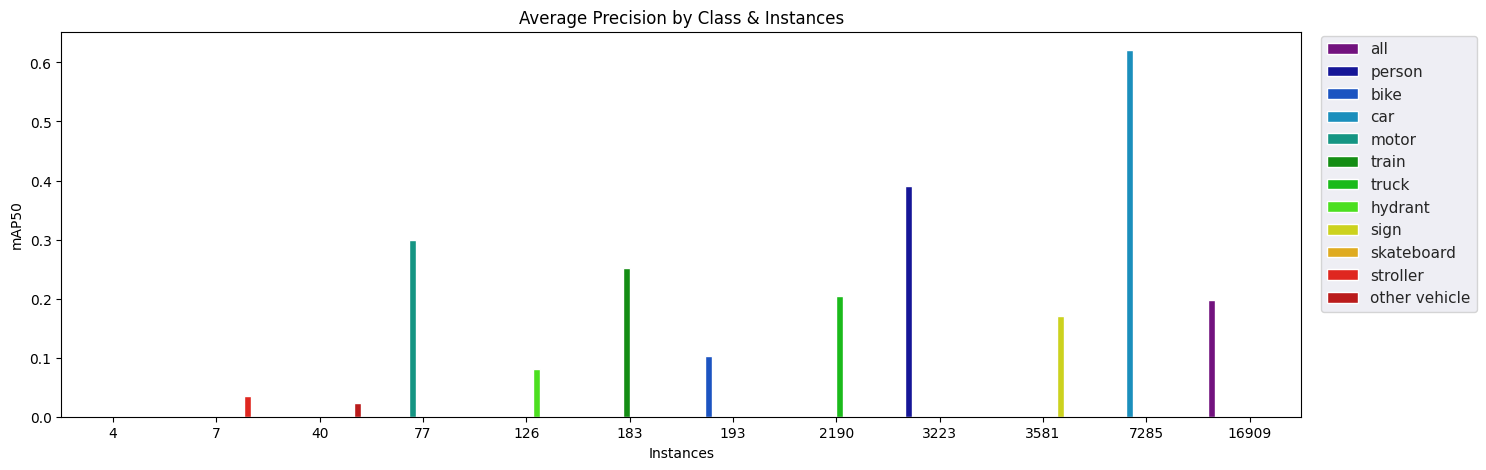

In [5]:
plt.figure(figsize=(16, 5))
plt.title('Average Precision by Class & Instances')
sns.set(style='darkgrid')
sns.barplot(
    data=rgb_nano_df.reset_index(),
    x='Instances',
    y='mAP50',
    errorbar='sd',
    hue='index',
    palette='nipy_spectral'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

### YOLOv8s & RGB Dataset

In [6]:
rgb_small = [
    ['rgb_small', 1085, 16909, 0.524, 0.253, 0.29, 0.159],
    ['rgb_small', 1085, 3223, 0.622, 0.428, 0.481, 0.225],
    ['rgb_small', 1085, 193, 0.247, 0.321, 0.239, 0.121],
    ['rgb_small', 1085, 7285, 0.722, 0.629, 0.683, 0.454],
    ['rgb_small', 1085, 77, 0.563, 0.338, 0.382, 0.219],
    ['rgb_small', 1085, 183, 0.575, 0.339, 0.41, 0.276],
    ['rgb_small', 1085, 2190, 0.6, 0.315, 0.333, 0.12],
    ['rgb_small', 1085, 126, 0.8, 0.175, 0.292, 0.129],
    ['rgb_small', 1085, 3581, 0.635, 0.243, 0.292, 0.149],
    ['rgb_small', 1085, 4, 0, 0, 0, 0],
    ['rgb_small', 1085, 7, 1, 0, 0.069, 0.0479],
    ['rgb_small', 1085, 40, 0, 0, 0.0136, 0.00526]
]

In [7]:
rgb_small_df = pd.DataFrame(rgb_small, data_index, data_columns)
rgb_small_df

Model  Images  Instances      P      R   mAP50  mAP50-95
all            rgb_small    1085      16909  0.524  0.253  0.2900   0.15900
person         rgb_small    1085       3223  0.622  0.428  0.4810   0.22500
bike           rgb_small    1085        193  0.247  0.321  0.2390   0.12100
car            rgb_small    1085       7285  0.722  0.629  0.6830   0.45400
motor          rgb_small    1085         77  0.563  0.338  0.3820   0.21900
train          rgb_small    1085        183  0.575  0.339  0.4100   0.27600
truck          rgb_small    1085       2190  0.600  0.315  0.3330   0.12000
hydrant        rgb_small    1085        126  0.800  0.175  0.2920   0.12900
sign           rgb_small    1085       3581  0.635  0.243  0.2920   0.14900
skateboard     rgb_small    1085          4  0.000  0.000  0.0000   0.00000
stroller       rgb_small    1085          7  1.000  0.000  0.0690   0.04790
other vehicle  rgb_small    1085         40  0.000  0.000  0.0136   0.00526

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

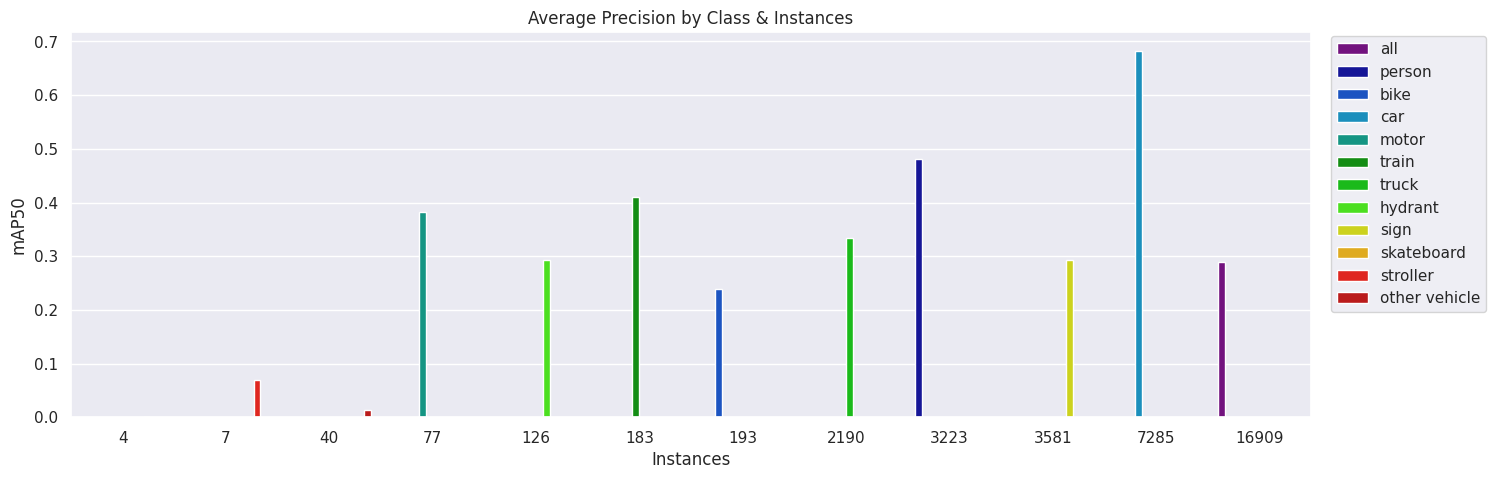

In [8]:
plt.figure(figsize=(16, 5))
plt.title('Average Precision by Class & Instances')
sns.set(style='darkgrid')
sns.barplot(
    data=rgb_small_df.reset_index(),
    x='Instances',
    y='mAP50',
    errorbar='sd',
    hue='index',
    palette='nipy_spectral'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

### YOLOv8n & IR Dataset

In [9]:
ir_nano = [
    ['ir_nano', 1144, 16688, 0.516, 0.249, 0.276, 0.146],
    ['ir_nano', 1144, 4470, 0.631, 0.556, 0.595, 0.276],
    ['ir_nano', 1144, 170, 0.288, 0.253, 0.222, 0.111],
    ['ir_nano', 1144, 7128, 0.696, 0.65, 0.711, 0.449],
    ['ir_nano', 1144, 55, 0.57, 0.364, 0.39, 0.189],
    ['ir_nano', 1144, 179, 0.746, 0.378, 0.455, 0.283],
    ['ir_nano', 1144, 2048, 0.462, 0.256, 0.271, 0.104],
    ['ir_nano', 1144, 94, 0.679, 0.0638, 0.12, 0.0526],
    ['ir_nano', 1144, 2472, 0.557, 0.199, 0.256, 0.132],
    ['ir_nano', 1144, 3, 0, 0, 0, 0],
    ['ir_nano', 1144, 6, 1, 0, 0, 0],
    ['ir_nano', 1144, 63, 0.0425, 0.0159, 0.0193, 0.00637]
]

In [10]:
ir_nano_df = pd.DataFrame(ir_nano, data_index, data_columns)
ir_nano_df

Model  Images  Instances       P       R   mAP50  mAP50-95
all            ir_nano    1144      16688  0.5160  0.2490  0.2760   0.14600
person         ir_nano    1144       4470  0.6310  0.5560  0.5950   0.27600
bike           ir_nano    1144        170  0.2880  0.2530  0.2220   0.11100
car            ir_nano    1144       7128  0.6960  0.6500  0.7110   0.44900
motor          ir_nano    1144         55  0.5700  0.3640  0.3900   0.18900
train          ir_nano    1144        179  0.7460  0.3780  0.4550   0.28300
truck          ir_nano    1144       2048  0.4620  0.2560  0.2710   0.10400
hydrant        ir_nano    1144         94  0.6790  0.0638  0.1200   0.05260
sign           ir_nano    1144       2472  0.5570  0.1990  0.2560   0.13200
skateboard     ir_nano    1144          3  0.0000  0.0000  0.0000   0.00000
stroller       ir_nano    1144          6  1.0000  0.0000  0.0000   0.00000
other vehicle  ir_nano    1144         63  0.0425  0.0159  0.0193   0.00637

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

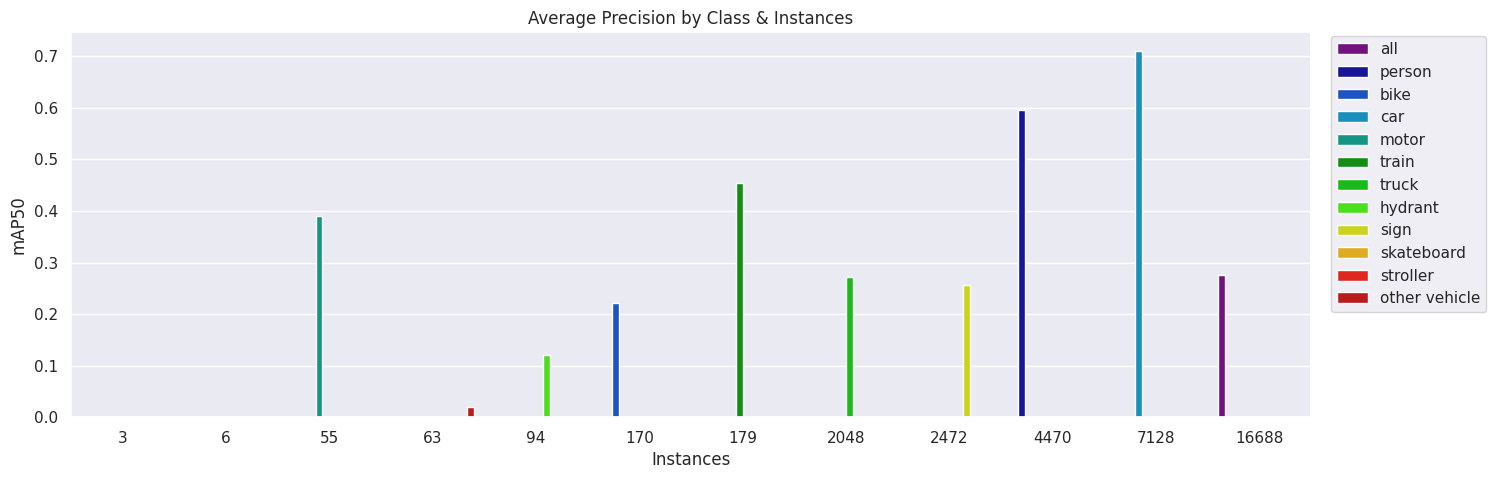

In [11]:
plt.figure(figsize=(16, 5))
plt.title('Average Precision by Class & Instances')
sns.set(style='darkgrid')
sns.barplot(
    data=ir_nano_df.reset_index(),
    x='Instances',
    y='mAP50',
    errorbar='sd',
    hue='index',
    palette='nipy_spectral'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

### YOLOv8s & RGB Dataset

In [12]:
ir_small = [
    ['ir_small', 1144, 16688, 0.555, 0.322, 0.358, 0.2],
    ['ir_small', 1144, 4470, 0.691, 0.632, 0.687, 0.356],
    ['ir_small', 1144, 170, 0.369, 0.353, 0.309, 0.174],
    ['ir_small', 1144, 7128, 0.743, 0.725, 0.781, 0.527],
    ['ir_small', 1144, 55, 0.593, 0.504, 0.551, 0.251],
    ['ir_small', 1144, 179, 0.683, 0.419, 0.527, 0.361],
    ['ir_small', 1144, 2048, 0.608, 0.386, 0.418, 0.178],
    ['ir_small', 1144, 94, 0.695, 0.149, 0.274, 0.148],
    ['ir_small', 1144, 2472, 0.614, 0.313, 0.362, 0.195],
    ['ir_small', 1144, 3, 0, 0, 0, 0],
    ['ir_small', 1144, 6, 1, 0, 0, 0],
    ['ir_small', 1144, 63, 0.112, 0.0635, 0.0254, 0.0151]
]

In [13]:
ir_small_df = pd.DataFrame(ir_small, data_index, data_columns)
ir_small_df

Model  Images  Instances      P       R   mAP50  mAP50-95
all            ir_small    1144      16688  0.555  0.3220  0.3580    0.2000
person         ir_small    1144       4470  0.691  0.6320  0.6870    0.3560
bike           ir_small    1144        170  0.369  0.3530  0.3090    0.1740
car            ir_small    1144       7128  0.743  0.7250  0.7810    0.5270
motor          ir_small    1144         55  0.593  0.5040  0.5510    0.2510
train          ir_small    1144        179  0.683  0.4190  0.5270    0.3610
truck          ir_small    1144       2048  0.608  0.3860  0.4180    0.1780
hydrant        ir_small    1144         94  0.695  0.1490  0.2740    0.1480
sign           ir_small    1144       2472  0.614  0.3130  0.3620    0.1950
skateboard     ir_small    1144          3  0.000  0.0000  0.0000    0.0000
stroller       ir_small    1144          6  1.000  0.0000  0.0000    0.0000
other vehicle  ir_small    1144         63  0.112  0.0635  0.0254    0.0151

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

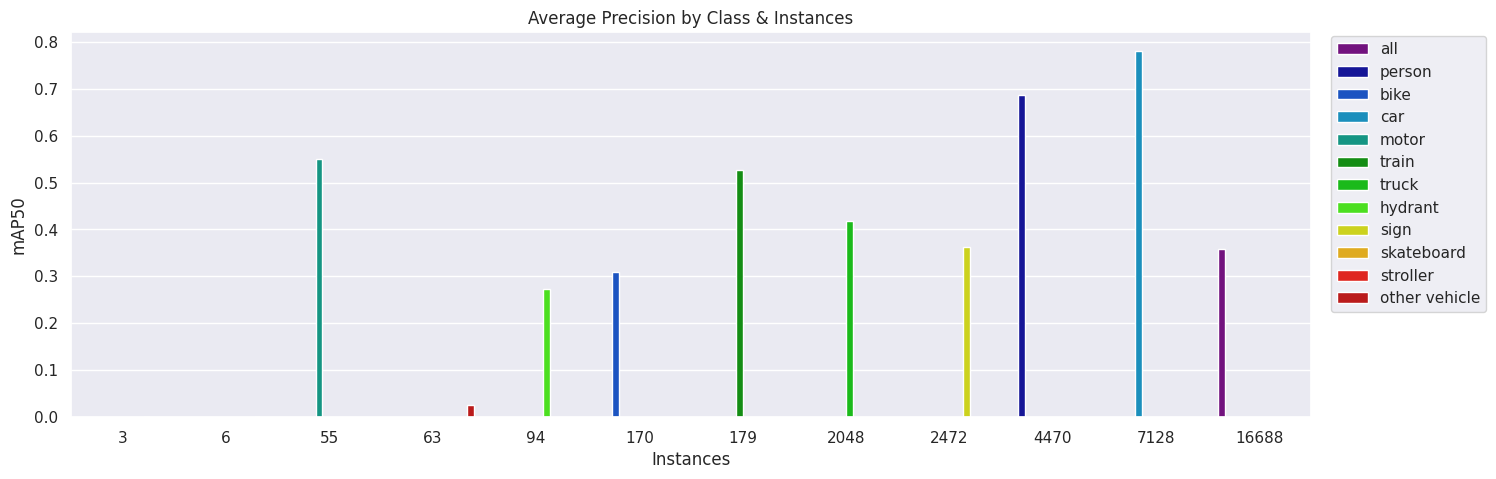

In [14]:
plt.figure(figsize=(16, 5))
plt.title('Average Precision by Class & Instances')
sns.set(style='darkgrid')
sns.barplot(
    data=ir_small_df.reset_index(),
    x='Instances',
    y='mAP50',
    errorbar='sd',
    hue='index',
    palette='nipy_spectral'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

### YOLOv8n & Combined Dataset

In [15]:
combined_nano = [
    ['combined_nano', 2229, 33597, 0.519, 0.242, 0.272, 0.147],
    ['combined_nano', 2229, 7693, 0.623, 0.482, 0.527, 0.253],
    ['combined_nano', 2229, 363, 0.281, 0.267, 0.239, 0.13],
    ['combined_nano', 2229, 14413, 0.686, 0.646, 0.697, 0.461],
    ['combined_nano', 2229, 132, 0.607, 0.364, 0.417, 0.193],
    ['combined_nano', 2229, 362, 0.666, 0.348, 0.424, 0.279],
    ['combined_nano', 2229, 4238, 0.493, 0.237, 0.256, 0.096],
    ['combined_nano', 2229, 220, 0.685, 0.0955, 0.162, 0.0676],
    ['combined_nano', 2229, 6053, 0.588, 0.205, 0.251, 0.131],
    ['combined_nano', 2229, 7, 0, 0, 0, 0],
    ['combined_nano', 2229, 13, 1, 0, 0, 0],
    ['combined_nano', 2229, 103, 0.0795, 0.0194, 0.023, 0.00967]
]

In [16]:
combined_nano_df = pd.DataFrame(combined_nano, data_index, data_columns)
combined_nano_df

Model  Images  Instances       P       R  mAP50  \
all            combined_nano    2229      33597  0.5190  0.2420  0.272   
person         combined_nano    2229       7693  0.6230  0.4820  0.527   
bike           combined_nano    2229        363  0.2810  0.2670  0.239   
car            combined_nano    2229      14413  0.6860  0.6460  0.697   
motor          combined_nano    2229        132  0.6070  0.3640  0.417   
train          combined_nano    2229        362  0.6660  0.3480  0.424   
truck          combined_nano    2229       4238  0.4930  0.2370  0.256   
hydrant        combined_nano    2229        220  0.6850  0.0955  0.162   
sign           combined_nano    2229       6053  0.5880  0.2050  0.251   
skateboard     combined_nano    2229          7  0.0000  0.0000  0.000   
stroller       combined_nano    2229         13  1.0000  0.0000  0.000   
other vehicle  combined_nano    2229        103  0.0795  0.0194  0.023   

               mAP50-95  
all             0.14700  
person          0.25300  
bike            0.13000  
car             0.46100  
motor           0.19300  
train           0.27900  
truck           0.09600  
hydrant         0.06760  
sign            0.13100  
skateboard      0.00000  
stroller        0.00000  
other vehicle   0.00967

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

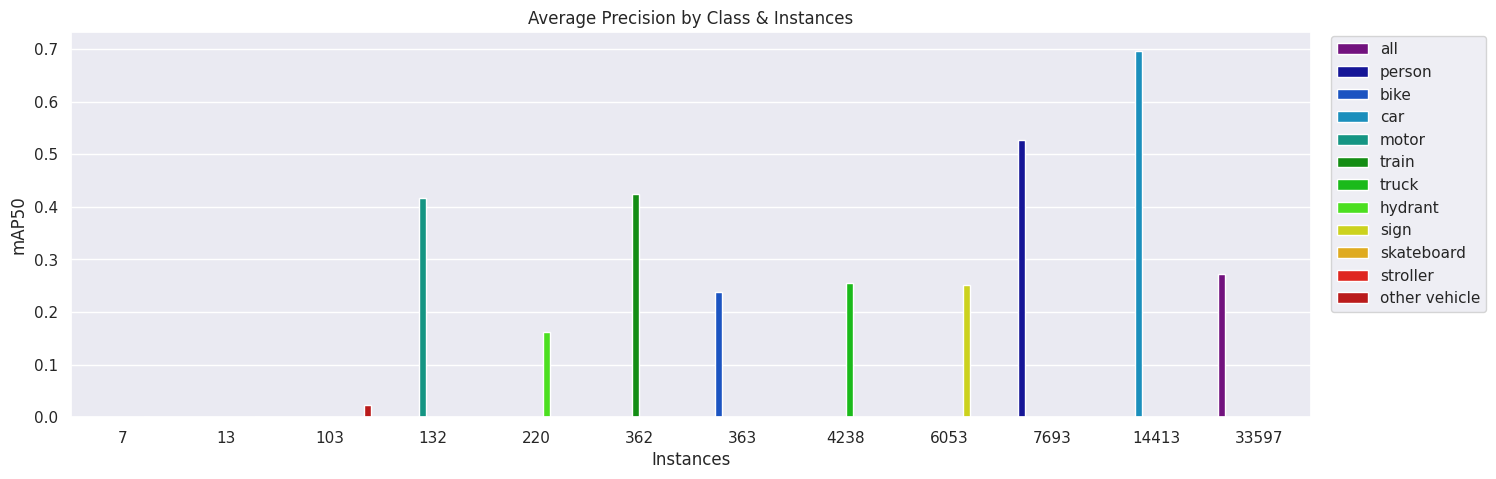

In [17]:
plt.figure(figsize=(16, 5))
plt.title('Average Precision by Class & Instances')
sns.set(style='darkgrid')
sns.barplot(
    data=combined_nano_df.reset_index(),
    x='Instances',
    y='mAP50',
    errorbar='sd',
    hue='index',
    palette='nipy_spectral'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

### YOLOv8s & Combined Dataset

In [18]:
combined_small = [
    ['combined_small', 2229, 33597, 0.651, 0.324, 0.359, 0.204],
    ['combined_small', 2229, 7693, 0.687, 0.569, 0.63, 0.326],
    ['combined_small', 2229, 363, 0.346, 0.383, 0.351, 0.198],
    ['combined_small', 2229, 14413, 0.734, 0.713, 0.764, 0.529],
    ['combined_small', 2229, 132, 0.633, 0.439, 0.514, 0.267],
    ['combined_small', 2229, 362, 0.707, 0.481, 0.556, 0.384],
    ['combined_small', 2229, 4238, 0.59, 0.391, 0.407, 0.167],
    ['combined_small', 2229, 220, 0.697, 0.178, 0.266, 0.122],
    ['combined_small', 2229, 6053, 0.617, 0.329, 0.371, 0.205],
    ['combined_small', 2229, 7, 1, 0, 0, 0],
    ['combined_small', 2229, 13, 1, 0, 0.0323, 0.024],
    ['combined_small', 2229, 103, 0.148, 0.0777, 0.0618, 0.0193]
]

In [19]:
combined_small_df = pd.DataFrame(combined_small, data_index, data_columns)
combined_small_df

Model  Images  Instances      P       R   mAP50  \
all            combined_small    2229      33597  0.651  0.3240  0.3590   
person         combined_small    2229       7693  0.687  0.5690  0.6300   
bike           combined_small    2229        363  0.346  0.3830  0.3510   
car            combined_small    2229      14413  0.734  0.7130  0.7640   
motor          combined_small    2229        132  0.633  0.4390  0.5140   
train          combined_small    2229        362  0.707  0.4810  0.5560   
truck          combined_small    2229       4238  0.590  0.3910  0.4070   
hydrant        combined_small    2229        220  0.697  0.1780  0.2660   
sign           combined_small    2229       6053  0.617  0.3290  0.3710   
skateboard     combined_small    2229          7  1.000  0.0000  0.0000   
stroller       combined_small    2229         13  1.000  0.0000  0.0323   
other vehicle  combined_small    2229        103  0.148  0.0777  0.0618   

               mAP50-95  
all              0.2040  
person           0.3260  
bike             0.1980  
car              0.5290  
motor            0.2670  
train            0.3840  
truck            0.1670  
hydrant          0.1220  
sign             0.2050  
skateboard       0.0000  
stroller         0.0240  
other vehicle    0.0193

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

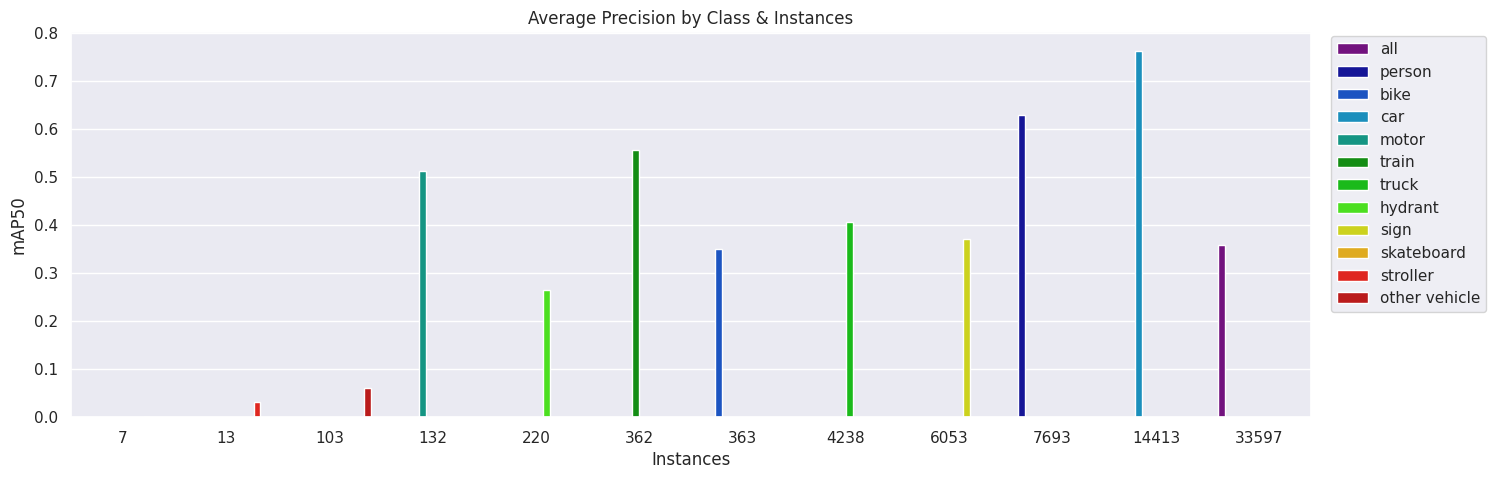

In [20]:
plt.figure(figsize=(16, 5))
plt.title('Average Precision by Class & Instances')
sns.set(style='darkgrid')
sns.barplot(
    data=combined_small_df.reset_index(),
    x='Instances',
    y='mAP50',
    errorbar='sd',
    hue='index',
    palette='nipy_spectral'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

### Combining Results

In [32]:
combined_df = pd.concat([rgb_nano_df, rgb_small_df, ir_nano_df, ir_small_df, combined_nano_df, combined_small_df], axis=0)
combined_df = combined_df.reset_index()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

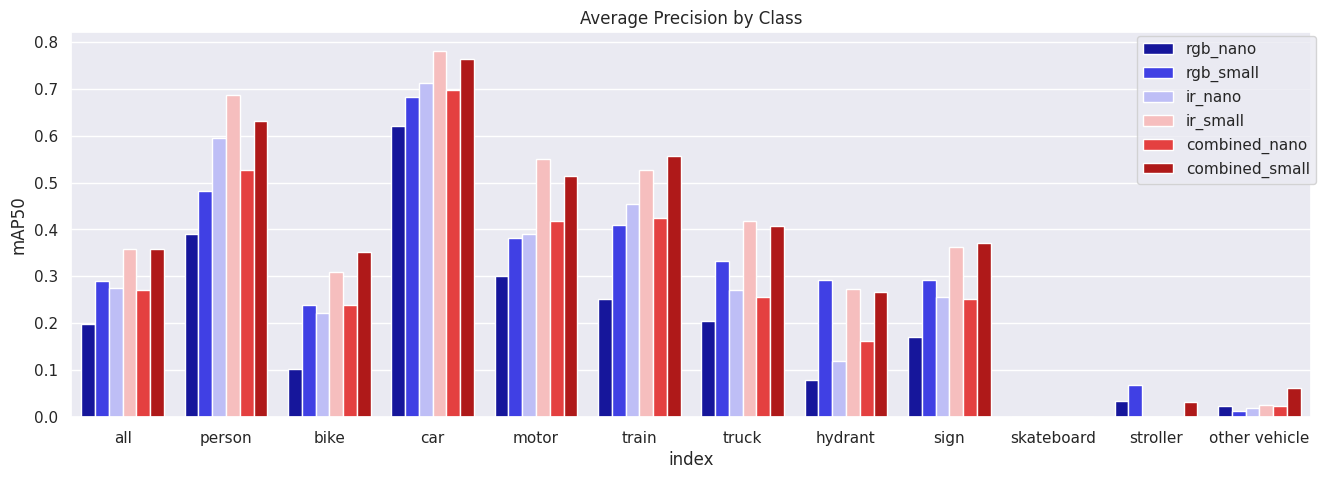

In [26]:
plt.figure(figsize=(16, 5))
plt.title('Average Precision by Class')
sns.set(style='darkgrid')
sns.barplot(
    data=combined_df.reset_index(),
    x='index',
    y='mAP50',
    errorbar='sd',
    hue='Model',
    palette='seismic'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Text(0.5, 1.0, 'Precision Recall')

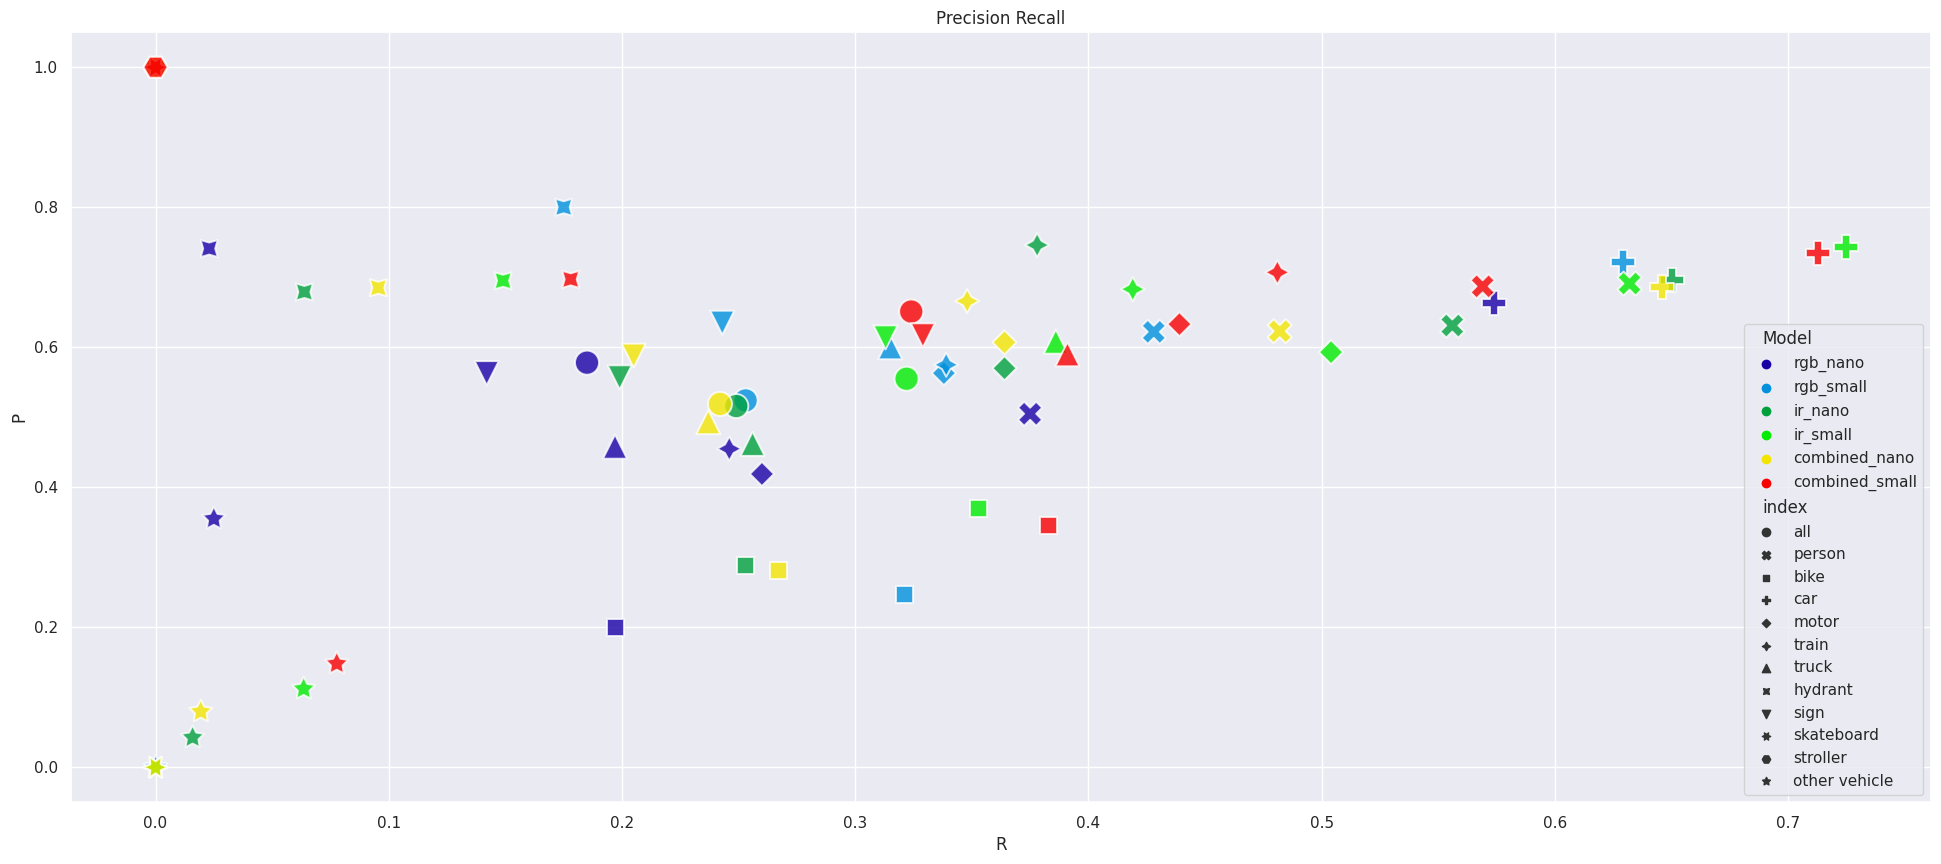

In [25]:
plt.figure(figsize=(24, 10))

sns.set(style='darkgrid')

sns.scatterplot(
    data=combined_df.reset_index(),
    x='R',
    y='P',
    s=300,
    alpha=0.8,
    hue='Model',
    palette='nipy_spectral',
    style='index'
).set_title('Precision Recall')

In [33]:
combined_df[combined_df['index'] == 'car']

index           Model  Images  Instances      P      R  mAP50  mAP50-95
3    car        rgb_nano    1085       7285  0.663  0.574  0.621     0.398
15   car       rgb_small    1085       7285  0.722  0.629  0.683     0.454
27   car         ir_nano    1144       7128  0.696  0.650  0.711     0.449
39   car        ir_small    1144       7128  0.743  0.725  0.781     0.527
51   car   combined_nano    2229      14413  0.686  0.646  0.697     0.461
63   car  combined_small    2229      14413  0.734  0.713  0.764     0.529

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

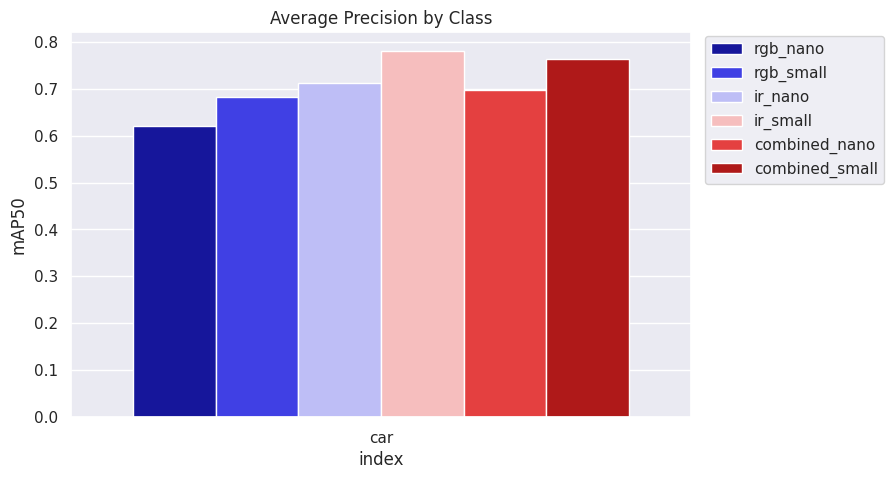

In [35]:
plt.figure(figsize=(8, 5))
plt.title('Average Precision by Class')
sns.set(style='darkgrid')
sns.barplot(
    data=combined_df[combined_df['index'] == 'car'],
    x='index',
    y='mAP50',
    errorbar='sd',
    hue='Model',
    palette='seismic'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

In [36]:
combined_df[combined_df['index'] == 'person']

index           Model  Images  Instances      P      R  mAP50  mAP50-95
1   person        rgb_nano    1085       3223  0.505  0.375  0.391     0.167
13  person       rgb_small    1085       3223  0.622  0.428  0.481     0.225
25  person         ir_nano    1144       4470  0.631  0.556  0.595     0.276
37  person        ir_small    1144       4470  0.691  0.632  0.687     0.356
49  person   combined_nano    2229       7693  0.623  0.482  0.527     0.253
61  person  combined_small    2229       7693  0.687  0.569  0.630     0.326

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

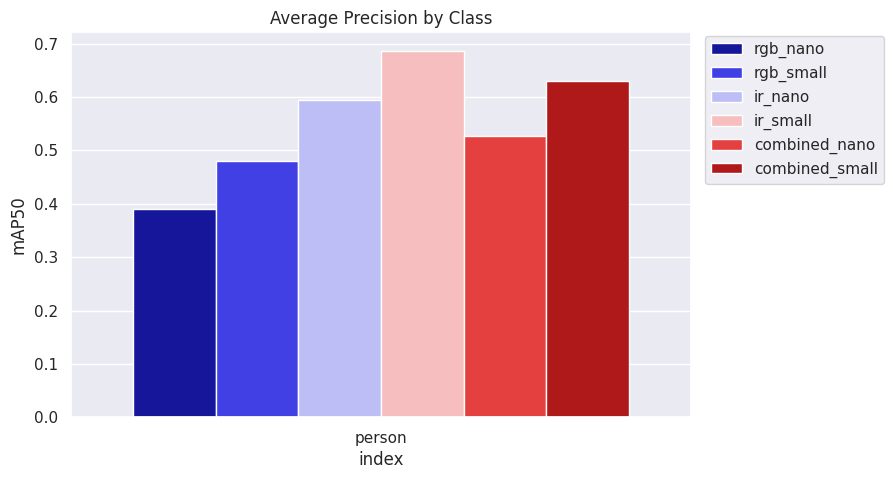

In [37]:
plt.figure(figsize=(8, 5))
plt.title('Average Precision by Class')
sns.set(style='darkgrid')
sns.barplot(
    data=combined_df[combined_df['index'] == 'person'],
    x='index',
    y='mAP50',
    errorbar='sd',
    hue='Model',
    palette='seismic'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

In [38]:
combined_df[combined_df['index'] == 'motor']

index           Model  Images  Instances      P      R  mAP50  mAP50-95
4   motor        rgb_nano    1085         77  0.419  0.260  0.300     0.166
16  motor       rgb_small    1085         77  0.563  0.338  0.382     0.219
28  motor         ir_nano    1144         55  0.570  0.364  0.390     0.189
40  motor        ir_small    1144         55  0.593  0.504  0.551     0.251
52  motor   combined_nano    2229        132  0.607  0.364  0.417     0.193
64  motor  combined_small    2229        132  0.633  0.439  0.514     0.267

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

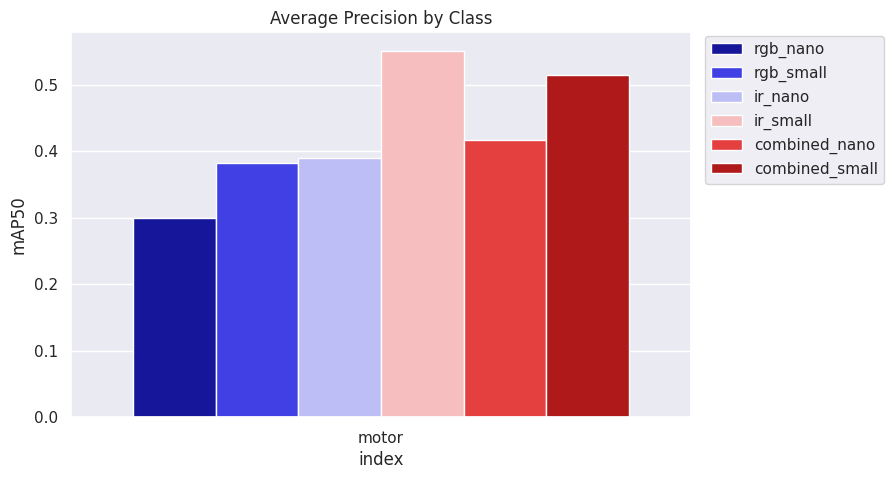

In [39]:
plt.figure(figsize=(8, 5))
plt.title('Average Precision by Class')
sns.set(style='darkgrid')
sns.barplot(
    data=combined_df[combined_df['index'] == 'motor'],
    x='index',
    y='mAP50',
    errorbar='sd',
    hue='Model',
    palette='seismic'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

In [40]:
combined_df[combined_df['index'] == 'bike']

index           Model  Images  Instances      P      R  mAP50  mAP50-95
2   bike        rgb_nano    1085        193  0.200  0.197  0.102     0.044
14  bike       rgb_small    1085        193  0.247  0.321  0.239     0.121
26  bike         ir_nano    1144        170  0.288  0.253  0.222     0.111
38  bike        ir_small    1144        170  0.369  0.353  0.309     0.174
50  bike   combined_nano    2229        363  0.281  0.267  0.239     0.130
62  bike  combined_small    2229        363  0.346  0.383  0.351     0.198

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

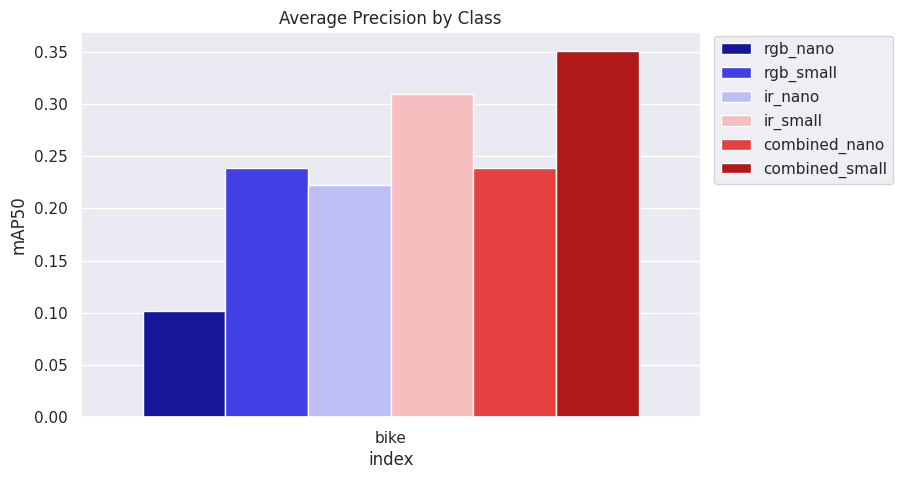

In [41]:
plt.figure(figsize=(8, 5))
plt.title('Average Precision by Class')
sns.set(style='darkgrid')
sns.barplot(
    data=combined_df[combined_df['index'] == 'bike'],
    x='index',
    y='mAP50',
    errorbar='sd',
    hue='Model',
    palette='seismic'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

In [42]:
combined_df[combined_df['index'] == 'truck']

index           Model  Images  Instances      P      R  mAP50  mAP50-95
6   truck        rgb_nano    1085       2190  0.458  0.197  0.205    0.0686
18  truck       rgb_small    1085       2190  0.600  0.315  0.333    0.1200
30  truck         ir_nano    1144       2048  0.462  0.256  0.271    0.1040
42  truck        ir_small    1144       2048  0.608  0.386  0.418    0.1780
54  truck   combined_nano    2229       4238  0.493  0.237  0.256    0.0960
66  truck  combined_small    2229       4238  0.590  0.391  0.407    0.1670

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

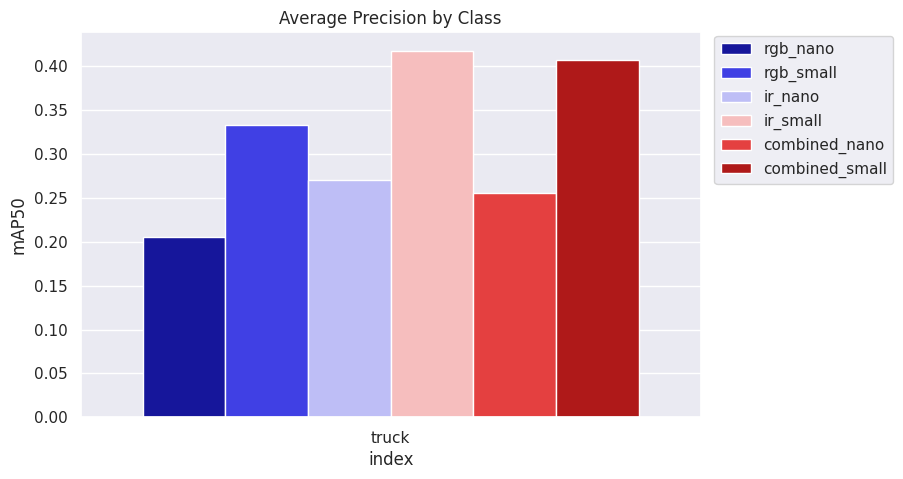

In [43]:
plt.figure(figsize=(8, 5))
plt.title('Average Precision by Class')
sns.set(style='darkgrid')
sns.barplot(
    data=combined_df[combined_df['index'] == 'truck'],
    x='index',
    y='mAP50',
    errorbar='sd',
    hue='Model',
    palette='seismic'
)
plt.legend(bbox_to_anchor=(1.01,1.01))

## Evaluate Bounding Boxes

In [116]:
# read images
images = glob('./datasets/images_combined_val/images/*.jpg')
print(len(images))

2229


In [117]:
# select image
img = cv.imread(images[0])
height, width, _ = img.shape

print(images[0][38:-4], height, width)

video-57kWWRyeqqHs3Byei-frame-000816-b6tuLjNco8MfoBs3d 512 640


In [13]:
# select label file
path = './datasets/images_combined_val/labels/' + images[0][38:-4] + '.txt'
labels = open(path, 'r')

data = labels.readlines()
labels.close()

print(data)

['9 0.696875 0.375000 0.025000 0.039062\n', '9 0.696094 0.314453 0.032813 0.082031\n', '9 0.168750 0.395508 0.040625 0.013672\n', '0 0.464063 0.457031 0.009375 0.027344\n', '0 0.004688 0.491211 0.009375 0.041016\n', '0 0.165625 0.489258 0.009375 0.033203\n', '1 0.316406 0.500000 0.014063 0.035156\n', '2 0.600781 0.511719 0.117188 0.113281\n', '2 0.524219 0.481445 0.060938 0.064453\n', '2 0.481250 0.469727 0.037500 0.033203\n', '2 0.426563 0.454102 0.015625 0.017578\n', '2 0.412500 0.463867 0.015625 0.025391\n', '2 0.376563 0.474609 0.018750 0.023438\n', '2 0.364063 0.477539 0.021875 0.033203\n', '2 0.342188 0.477539 0.034375 0.041016\n', '0 0.315625 0.483398 0.021875 0.044922\n', '8 0.105469 0.500977 0.007812 0.021484\n']


In [75]:
# create one colour for every COCO class
colours = []
number_colours=80

for j in range(number_colours):
    colour = np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)
    colours.append(colour)

print(len(colours),colours)

80 [(129, 83, 161), (220, 116, 220), (47, 113, 141), (185, 137, 77), (212, 208, 251), (36, 83, 204), (4, 40, 112), (61, 18, 39), (25, 132, 21), (239, 67, 234), (140, 253, 52), (207, 196, 72), (144, 32, 112), (138, 29, 227), (101, 17, 45), (102, 118, 7), (210, 51, 160), (59, 158, 131), (37, 145, 69), (68, 56, 71), (28, 96, 25), (72, 189, 118), (190, 67, 118), (152, 48, 33), (153, 138, 248), (218, 94, 242), (236, 229, 215), (133, 186, 102), (33, 198, 167), (223, 32, 103), (16, 209, 160), (83, 89, 91), (194, 46, 110), (243, 47, 47), (187, 11, 41), (193, 188, 6), (107, 119, 230), (116, 118, 109), (65, 155, 110), (12, 151, 145), (135, 138, 197), (43, 19, 174), (52, 203, 214), (72, 178, 172), (10, 247, 17), (108, 90, 185), (134, 29, 207), (217, 96, 179), (2, 38, 161), (245, 175, 254), (254, 57, 175), (84, 184, 46), (249, 195, 60), (246, 67, 127), (51, 89, 138), (12, 162, 182), (176, 89, 187), (165, 40, 110), (141, 76, 226), (245, 187, 119), (47, 237, 138), (173, 176, 50), (49, 101, 36), (171

### Show Labels

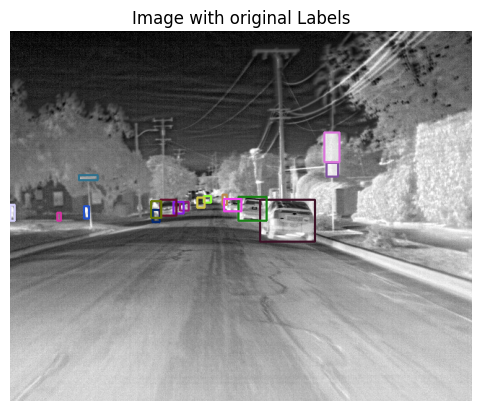

In [105]:
index = 0

for line in data:

    # Split string to float
    _, x, y, w, h = map(float, line.split(' '))
    
    l = int((x - w / 2) * width)
    r = int((x + w / 2) * width)
    t = int((y - h / 2) * height)
    b = int((y + h / 2) * height)
    
    if l < 0:
        l = 0
    if r > width - 1:
        r = width - 1
    if t < 0:
        t = 0
    if b > height - 1:
        b = height - 1

    image = cv.rectangle(img, (l, t), (r, b), colours[index], thickness=2)
    index += 1

plt.title('Image with original Labels')
plt.axis('off')
plt.imshow(image)
plt.show()

### Show Predictions

In [94]:
# Load the best model
backbone_combined_small = YOLO('./runs/detect/backbone_combined_small.torchscript')


0: 640x640 5 persons, 1 bike, 11 cars, 3 signs, 16.8ms
Speed: 8.9ms preprocess, 16.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


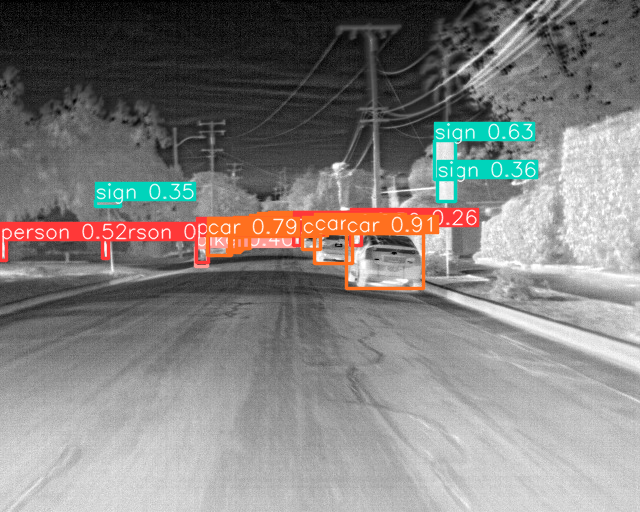

In [115]:
# Run batched inference on a list of images
results = backbone_combined_small(img)  # return a list of Results objects

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image

### Show Labels

In [118]:
# get another image
img = cv.imread(images[1337])
height, width, _ = img.shape

# get labels
path = './datasets/images_combined_val/labels/' + images[1337][38:-4] + '.txt'
labels = open(path, 'r')

data = labels.readlines()
labels.close()

In [112]:
index = 0

for line in data:

    # Split string to float
    _, x, y, w, h = map(float, line.split(' '))
    
    l = int((x - w / 2) * width)
    r = int((x + w / 2) * width)
    t = int((y - h / 2) * height)
    b = int((y + h / 2) * height)
    
    if l < 0:
        l = 0
    if r > width - 1:
        r = width - 1
    if t < 0:
        t = 0
    if b > height - 1:
        b = height - 1

    image = cv.rectangle(img, (l, t), (r, b), colours[index], thickness=2)
    index += 1

plt.title('Image with original Labels')
plt.axis('off')
plt.imshow(image)
plt.show()

### Show Predictions

In [119]:
# Run batched inference on a list of images
results = backbone_combined_small(img)  # return a list of Results objects

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image


0: 640x640 2 persons, 1 car, 7 trucks, 2 signs, 17.7ms
Speed: 12.7ms preprocess, 17.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


### Show Labels

In [122]:
# get another image
img = cv.imread(images[666])
height, width, _ = img.shape

# get labels
path = './datasets/images_combined_val/labels/' + images[666][38:-4] + '.txt'
labels = open(path, 'r')

data = labels.readlines()
labels.close()

In [121]:
index = 0

for line in data:

    # Split string to float
    _, x, y, w, h = map(float, line.split(' '))
    
    l = int((x - w / 2) * width)
    r = int((x + w / 2) * width)
    t = int((y - h / 2) * height)
    b = int((y + h / 2) * height)
    
    if l < 0:
        l = 0
    if r > width - 1:
        r = width - 1
    if t < 0:
        t = 0
    if b > height - 1:
        b = height - 1

    image = cv.rectangle(img, (l, t), (r, b), colours[index], thickness=2)
    index += 1

plt.title('Image with original Labels')
plt.axis('off')
plt.imshow(image)
plt.show()

### Show Predictions


0: 640x640 2 persons, 3 bikes, 7 cars, 1 sign, 16.9ms
Speed: 13.9ms preprocess, 16.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


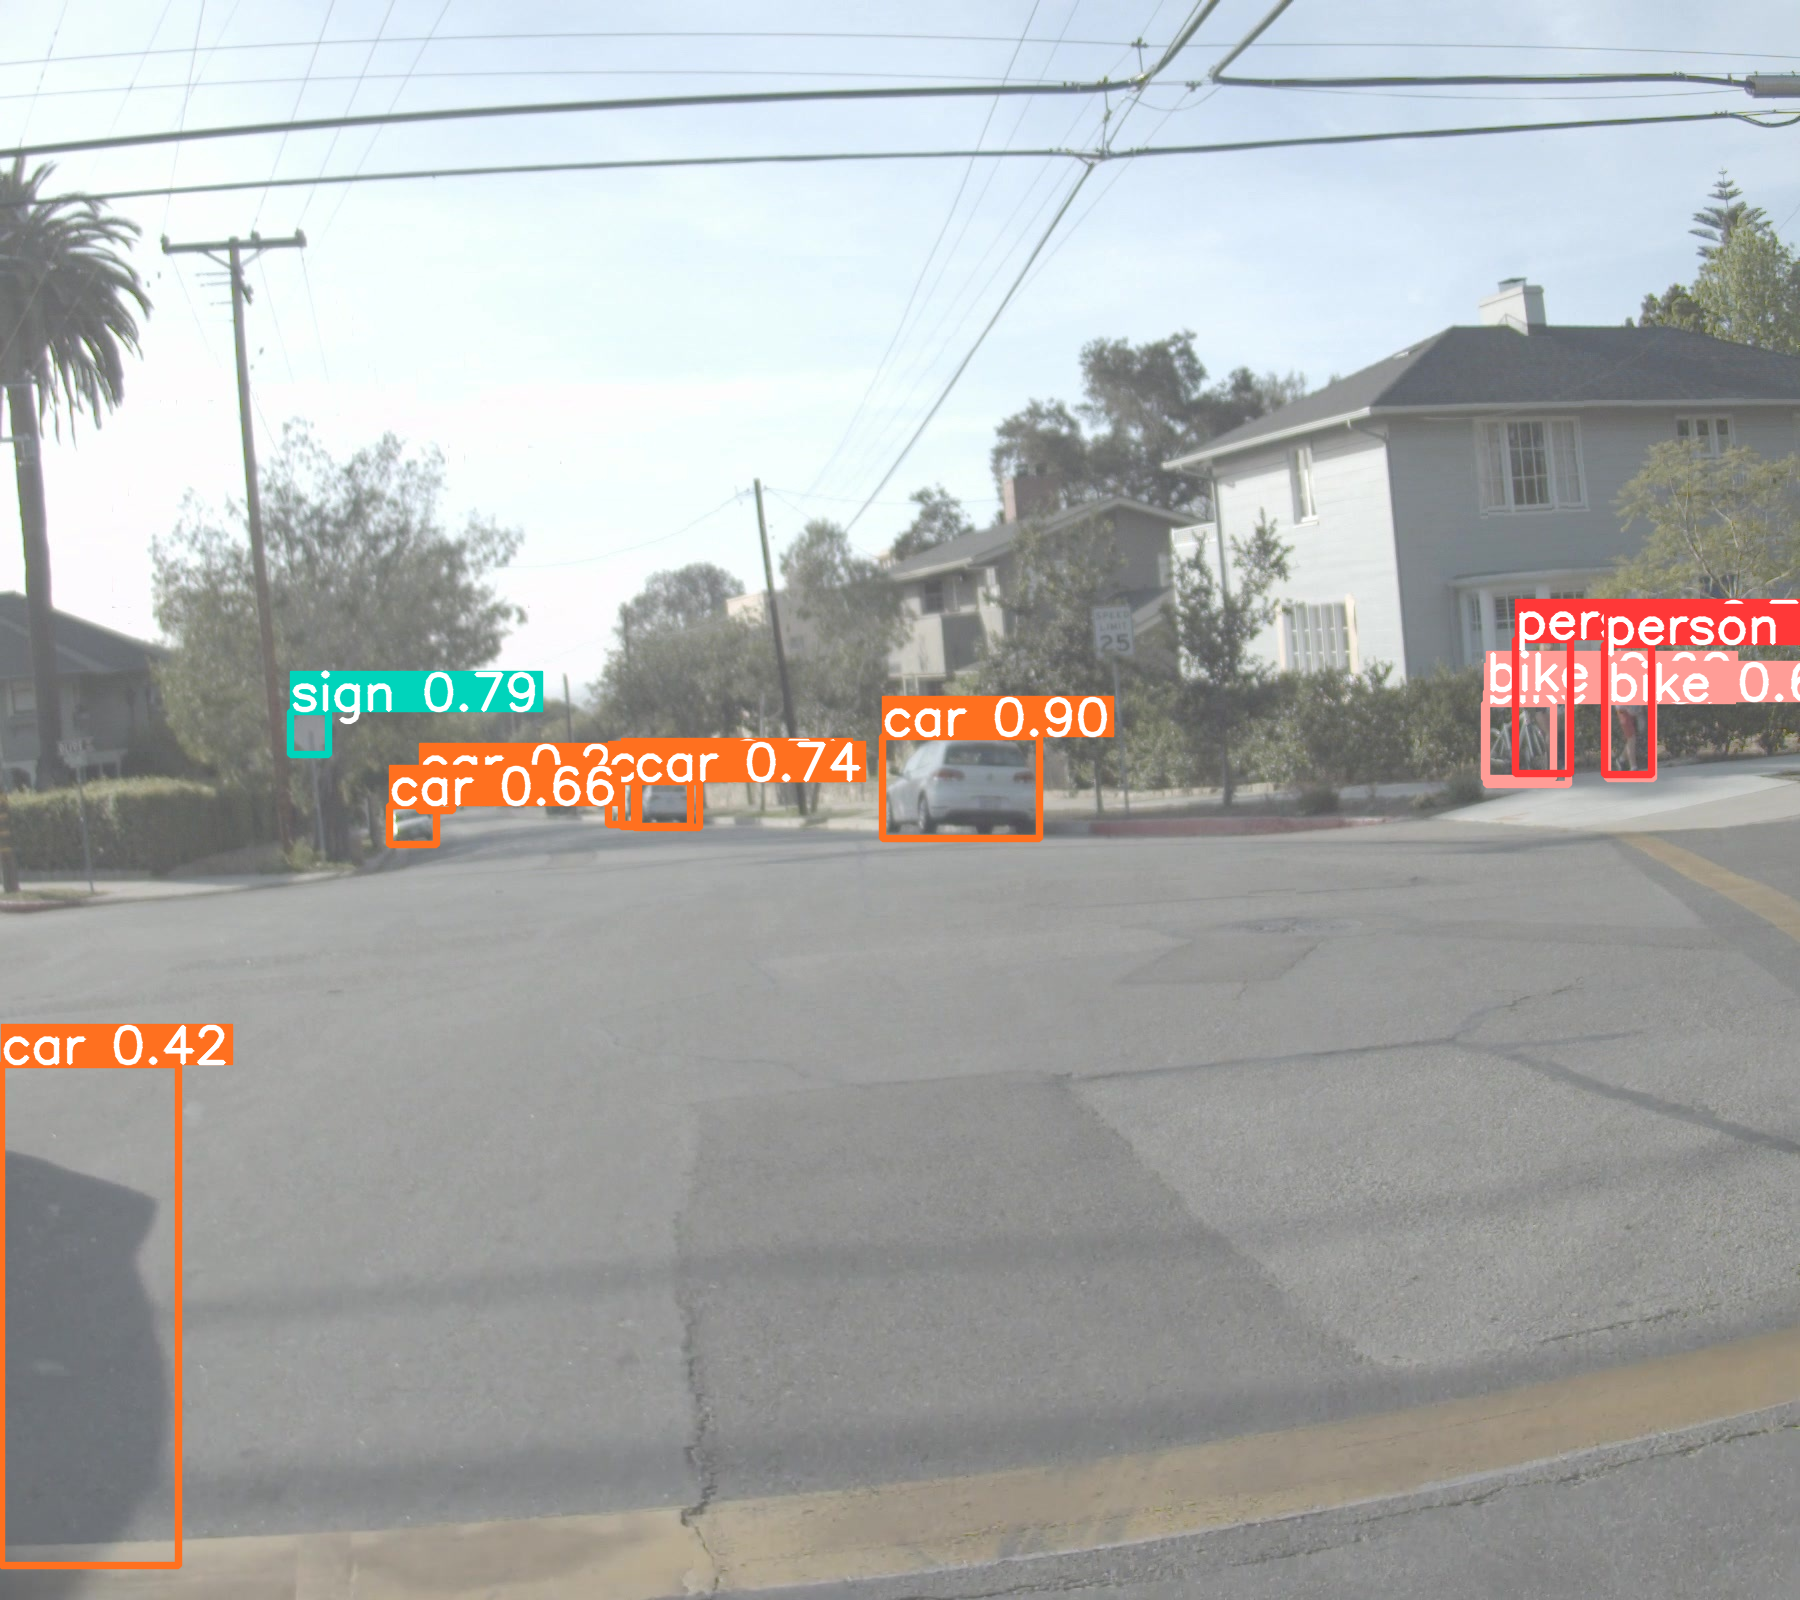

In [123]:
# Run batched inference on a list of images
results = backbone_combined_small(img)  # return a list of Results objects

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image